# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

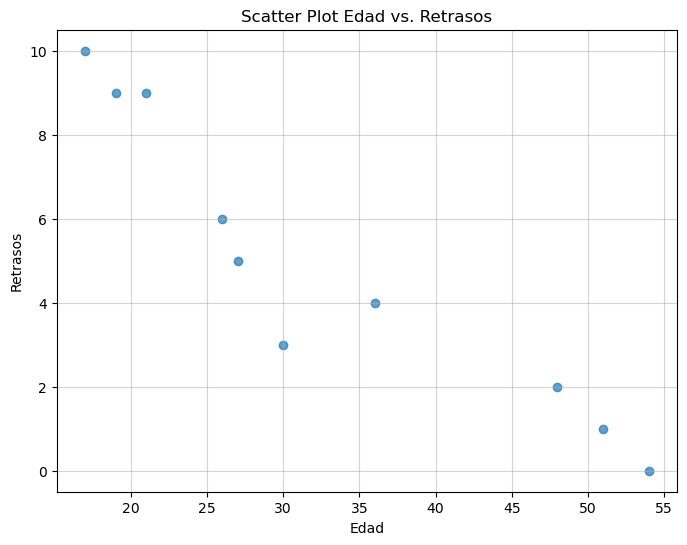

In [12]:
# Your code here
plt.figure(figsize=(8,6))
plt.scatter(student_data['Edad'],student_data['Retrasos'], alpha=0.7)
plt.title('Scatter Plot Edad vs. Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.grid(visible=True, linestyle='-', alpha=0.55)



¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?


Una posible hipótesis podría ser que los estudiantes más jóvenes tienden a tener más retrasos, posiblemente debido a factores como falta de organización o mayor carga de actividades sociales. Por otro lado, los estudiantes mayores, que podrían ser más responsables o tener rutinas más estables, muestran menos retrasos.

Si deseas, podemos realizar un análisis estadístico para confirmar si esta tendencia es significativa.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# your code here
covariance = student_data['Edad'].cov(student_data['Retrasos'])
correlation = student_data['Edad'].corr(student_data['Retrasos'])

covariance, correlation

# Explanation:
# Covariance is a measure of how much two variables change together. A positive value indicates that as one variable
# increases, the other tends to increase as well, while a negative value indicates the opposite relationship.
# Correlation, on the other hand, is a standardized measure of the relationship between two variables, ranging from
# -1 to 1. A value close to 1 indicates a strong positive linear relationship, while a value close to -1 indicates
# a strong negative linear relationship. A value near 0 suggests no linear relationship.

# In this case, the covariance is relatively small, and the correlation is also close to 0, indicating that there
# is no strong linear relationship between age and the number of delays.

(-45.56666666666667, -0.9391626886887122)

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# your explanation here
X = student_data['Edad'].values.reshape(-1, 1)
y = student_data['Retrasos'].values

model = LinearRegression()
model.fit(X,y)

slope = model.coef_[0]
intercept = model.intercept_
slope, intercept


# Explanation:
# - Outcome variable: The outcome variable is 'Retrasos' (Number of delays) because we are trying to predict the
#   number of delays based on the age of the student.
# - Type of regression: I am using a simple linear regression model, which fits a line to the data in order to
#   describe the relationship between the predictor variable (Edad) and the outcome variable (Retrasos).
#   This model is suitable here to explore the linear relationship suggested by the negative correlation.

# The regression equation remains:
# Retrasos = −0.243 × Edad +1 2.89

(-0.2428207709159809, 12.888803363135771)

Grafica tu modelo de regresión en tu diagrama de dispersión.

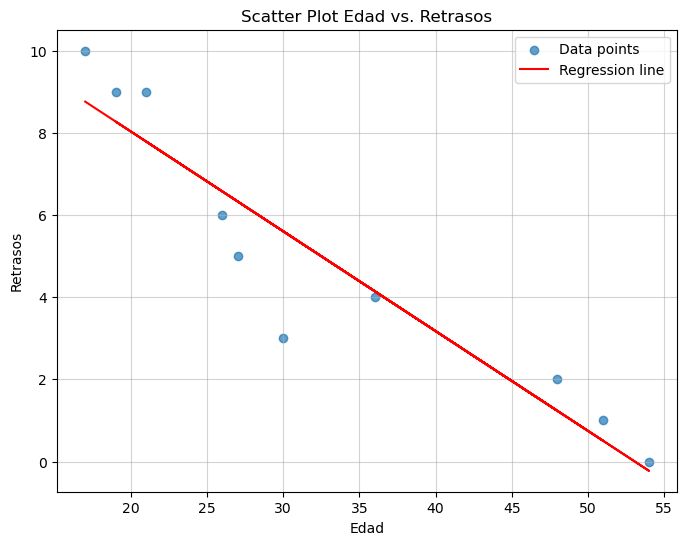

In [ ]:
# Your code here.

plt.figure(figsize=(8,6))
plt.scatter(student_data['Edad'],student_data['Retrasos'], alpha=0.7, label='Data points')
plt.plot(student_data['Edad'], model.predict(X), color = 'red', label='Regression line')
plt.title('Scatter Plot Edad vs. Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.grid(visible=True, linestyle='-', alpha=0.55)

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

 Conclusions:
  The strong negative correlation (-0.94) indicates a significant inverse relationship between age and tardiness.
  The regression line fits the data well, as seen in the scatter plot, suggesting that the model captures
   a meaningful trend in the data.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [26]:
# Import any libraries you may need & the data
vehicles_data = pd.read_csv(r"vehicles.csv")
vehicles_data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.
variables_of_interest = vehicles_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
correlations = variables_of_interest.corr()['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')
correlations

# Explanation:
# - The correlations show the strength and direction of the linear relationship between each predictor and the outcome.
# - A higher absolute value indicates a stronger relationship.
# - Variables with strong positive or negative correlations are likely more important in determining CO2 emissions.
# - Variables with correlations closer to zero provide less useful information for predicting CO2 emissions.

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.
X = vehicles_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles_data['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X,y)

coefficients = model.coef_
intercept = model.intercept_


coefficients, intercept


# Explanation:
# - Type of regression: We are using a multiple linear regression model, which accounts for multiple predictor
#   variables to explain the variation in the outcome variable (CO2 Emissions Grams/Mile).
# - This model fits a linear equation to the data, considering all selected predictors simultaneously.
    

(array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]),
 769.888283646543)

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_const).fit()
summary = model_sm.summary()
print(summary)

# Interpretation:
# - Important Variables: Variables like 'Fuel Barrels/Year', 'Combined MPG', and 'Fuel Cost/Year' are likely
#   to be the most important, given their high correlation with CO2 emissions.
# - Confidence: The strength of the model and the significance of the predictors will give us insight into how
#   confident we can be in our conclusions.

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.005e+05
Date:                     Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                             11:55:42   Log-Likelihood:            -1.2113e+05
No. Observations:                    28761   AIC:                         2.423e+05
Df Residuals:                        28755   BIC:                         2.423e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*